In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from sklearn.decomposition import PCA
import pickle

In [3]:
session519 = CortProcessor('/home/diya/Documents/rat-fes/data/rat-annie/5-19')

read from t=0s to t=151.37s
read from t=0s to t=202.23s
read from t=0s to t=192.28s
read from t=0s to t=201.04s
read from t=0s to t=181.47s


In [ ]:
#session = CortProcessor('/home/diya/Documents/rat-fes/data/rat-annie/5-10')
with open('/home/diya/Documents/rat-fes/scripts/annie510session.pkl', 'wb') as inp:
    pickle.dump(session519, inp)

In [ ]:
#crop for annie-5-6
#crop=[(33, 120), (10, 115), (15, 208), (10, 165)]

In [ ]:
#crop for annie-5-10
#crop = [(90,155), (0,120), (0, 167), (7, 220)]

In [ ]:
#crop for annie-5-12
#crop = [(12,160),(10,155), (9, 210), (12, 230)]


In [4]:
#crop for annie 5-19
crop519 = [(60, 140), (14,185), (20, 175), (15,  180), (10, 165)]

In [5]:
rate, kin = session519.process(crop519, threshold_multiplier=3.0)

In [6]:
h, vaf, xtest, ytest = session519.decode_angles()

In [7]:
np.average(vaf,axis=1)

array([0.12765898, 0.26542302, 0.15700302, 0.25442188, 0.19374881,
       0.05012257, 0.17620847])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
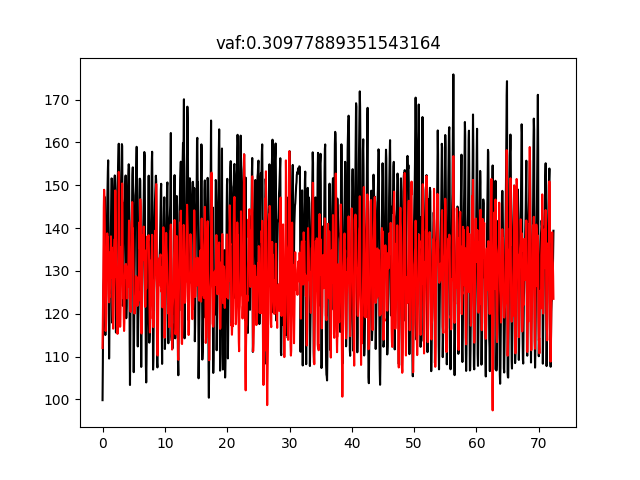

In [9]:
plot_wiener_filter_predic(xtest, ytest[:,6], h[:,6])

In [ ]:
rates, kins = session510.stitch_data(session510.rate_list, session510.angle_list)

In [ ]:
session510.get_gait_indices()

In [ ]:
X_gait, Y_gait = session510.divide_into_gaits(rates, kins)

In [ ]:
np.array(X_gait).shape, np.array(Y_gait).shape

In [ ]:
session510.neuron_tuning(X_gait)

In [ ]:
df = session510.norm_sorted_neurons

In [ ]:
df.columns

In [ ]:
plot_raster(session510.norm_sorted_neurons)

In [ ]:
rates_pca_3, pca_output = apply_PCA(rates.T, 3)

In [ ]:
rates_pca_3 = rates_pca_3.T
print(rates_pca_3.shape)

In [ ]:
gait_rates_3, nada = session.divide_into_gaits(rates_pca_3, angles)

In [ ]:
gait_rates_3 = np.array(gait_rates_3)

In [ ]:
avg_gait_rates_3 = np.average(gait_rates_3, axis=0)

In [ ]:
np.vstack((avg_gait_rates_3.T, avg_gait_rates_3[:,0].T)).T.shape

In [ ]:
gait_state_space(gait_rates_3)

In [ ]:
rates_PCA.shape

In [ ]:
fig, ax = plt.subplots()
ax.plot(pca_output.explained_variance_ratio_)

In [ ]:
ret = session.process_toe_height()

In [ ]:
h_toe, vaf_toe, x_toe, y_toe = session.decode_toe_height()

In [ ]:
predic_y_toe = test_wiener_filter(x_toe, h_toe)
print(vaf(y_toe, predic_y_toe))
fig1 = plt.figure()
ax1=fig1.add_subplot(111)
ax1.plot(y_toe)
ax1.plot(predic_y_toe)

In [ ]:
session.divide_into_gaits()

In [ ]:
ret = session.neuron_tuning()

In [ ]:
raster(ret)

In [ ]:
avg_gait_array.shape

In [ ]:
np.sort(np.argmax(avg_gait_array, axis=1))

In [ ]:
h, vaffy, test_x, test_y = session.decode_angles()

In [ ]:
avg_vaf = np.average(vaffy, axis=1)
predic_y = test_wiener_filter(test_x, h)
print(avg_vaf)

In [ ]:
fig0 = plt.figure()
ax0=fig0.add_subplot(111)
ax0.plot(test_y[:,3])
ax0.plot(predic_y[:,3])

print(vaf(test_y[:,3], predic_y[:,3]))

In [ ]:
session.divide_into_gaits()

In [ ]:
np.array(session.rate_gait).shape

In [ ]:
len(session.angle_gait)

In [ ]:
crop1 = (5,180)
crop2 = (31,227)
crop3 = (5,200)
crop4 = (5,150)

crop_list = []
crop_list.extend((crop1, crop2, crop3, crop4))

In [ ]:
sess1 = CortProcessor('/home/diya/Documents/rat-fes/data/rat-t/session1')

In [ ]:
rates, kins = sess1.process(crop_list)

In [ ]:
a, b, c, d = sess1.linear_decoder(rates,kins)

In [ ]:
np.average(b, axis=1)

In [ ]:
path = '/home/diya/Documents/rat-fes/data/rat-annie/5-6-22/annie2-220506-133311/live_videos'

In [ ]:
for file_name in os.listdir(path):
    if file_name.endswith('.npy'):
        print(file_name)
    


In [ ]:
file_name.split('-')